In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb

https://forecastegy.com/posts/xgboost-binary-classification-python/

In [2]:
# Load the data
data_with_coords = pd.read_csv("E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/unk_loc_leks/all_leks_scores_unk_loc_leks_for_model.csv")
data = data_with_coords.drop(columns = ['lek', 'y_northing', 'x_easting', 'still_active', 'w_in_2000_not_active','within_2000m'])
# Display the first few rows of the data
data.head()

,max_dsp_hub_score,max_dsp_centrality_score,avg_dsp_hub_score,avg_dsp_centrality_score,rnd_trip_hub_score,rnd_trip_centrality_score,hr_hub_score,hr_centrality_score,k_hub_score,k_centrality_score,k2_hub_score,k2_centrality_score,within_4800m
0,0.945,205.105,0.631,191.884,0.711,489.789,0.561,3651.066,0.000,92.000,0.000,1027.520,1
1,0.958,224.770,0.758,687.098,0.762,1958.549,0.476,21173.860,0.000,94.911,0.000,10.353,1
2,0.955,219.368,0.684,372.106,0.685,954.002,0.276,265.889,0.000,379.546,0.000,334.802,1
3,0.931,182.535,0.657,212.460,0.820,258.645,0.952,931.250,0.074,1351.856,0.259,9002.776,1
4,0.922,173.611,0.601,135.845,0.762,620.600,0.770,3350.399,0.000,10.000,0.010,466.184,1


In [3]:
from sklearn.model_selection import train_test_split

# Separate target variable
X = data.drop('within_4800m', axis=1)
y = data['within_4800m']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42) #test size orginally 0.3

In [4]:
# Now you can get the indices of the rows in the original dataset
train_indices = X_train.index.tolist()
test_indices = X_test.index.tolist()

testing_df = data.loc[test_indices]
#print("Training set indices:", train_indices)
print("\nTesting set:")
testing_df.head()


Testing set:


,max_dsp_hub_score,max_dsp_centrality_score,avg_dsp_hub_score,avg_dsp_centrality_score,rnd_trip_hub_score,rnd_trip_centrality_score,hr_hub_score,hr_centrality_score,k_hub_score,k_centrality_score,k2_hub_score,k2_centrality_score,within_4800m
1460,0.034,4419.658,0.962,8.000,1.000,0.000,0.567,6.000,1.000,0.000,1.000,0.000,0
373,0.920,171.359,0.609,153.938,0.776,822.077,0.861,2978.781,0.000,330.000,0.010,4575.818,1
462,0.994,374.853,0.880,3930.372,0.476,4487.415,0.000,12091.540,0.102,48.667,0.000,1509.062,1
66,0.968,252.927,0.020,1745.124,0.000,1026.207,0.000,15060.611,0.259,519.489,0.000,1264.249,1
377,0.942,195.483,0.718,306.593,0.861,399.991,0.998,1438.347,0.376,409.193,0.621,2039.339,1


In [5]:
from xgboost import XGBClassifier
stq_model = XGBClassifier(objective='binary:logistic', seed = 42, early_stopping_rounds=10)
stq_model.fit(X_train, y_train, verbose = True, eval_set = [(X_test, y_test)])

[0]	validation_0-logloss:0.33682
[1]	validation_0-logloss:0.28044
[2]	validation_0-logloss:0.24984
[3]	validation_0-logloss:0.22742
[4]	validation_0-logloss:0.21033
[5]	validation_0-logloss:0.19700
[6]	validation_0-logloss:0.18822
[7]	validation_0-logloss:0.17813
[8]	validation_0-logloss:0.17252
[9]	validation_0-logloss:0.16625
[10]	validation_0-logloss:0.16084
[11]	validation_0-logloss:0.15784
[12]	validation_0-logloss:0.15455
[13]	validation_0-logloss:0.15229
[14]	validation_0-logloss:0.15233
[15]	validation_0-logloss:0.14882
[16]	validation_0-logloss:0.14774
[17]	validation_0-logloss:0.14536
[18]	validation_0-logloss:0.14479
[19]	validation_0-logloss:0.14419
[20]	validation_0-logloss:0.14483
[21]	validation_0-logloss:0.14386
[22]	validation_0-logloss:0.14370
[23]	validation_0-logloss:0.14606
[24]	validation_0-logloss:0.14566
[25]	validation_0-logloss:0.14596
[26]	validation_0-logloss:0.14759
[27]	validation_0-logloss:0.14793
[28]	validation_0-logloss:0.14683
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 94.34%


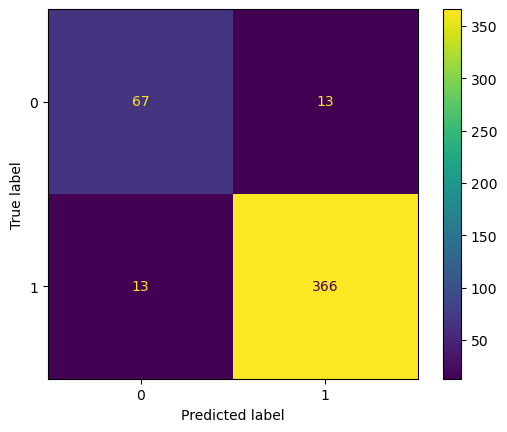

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
# Calculate accuracy
accuracy_og = stq_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy_og * 100.0))
ConfusionMatrixDisplay.from_estimator(stq_model, X_test, y_test)

In [9]:
from sklearn.model_selection import GridSearchCV
"""
param_grid_1 = {
    "max_depth" : [3, 4, 5],
    "learning_rate" : [0.1, 0.01, 0.05],
    "gamma" : [0, 0.25, 1.0],
    "reg_lambda" : [0, 1.0, 10],
    "scale_pos_weight" : [1, 3, 5],
    "eta": [0.01, 0.05, 0.1]
}
"""
 # the original
param_grid_2 = {
    "max_depth" : [5, 6, 7],
    "learning_rate" : [0.1, 0.5, 1],
    "gamma" : [0.25],
    "reg_lambda" : [1],
    "scale_pos_weight" : [1, 3, 5],
    "eta" : [0.01, 0.005, 0.001],
    #"objective": "binary:logistic",
    #"subsample": 0.5,
    #"base_score": np.mean(y_train),
    #"eval_metric": "logloss"
}


optimal_params = GridSearchCV(
    estimator = XGBClassifier(objective = 'binary:logistic',
                              early_stopping_rounds = 10,
                             seed = 42,
                             subsample = 0.7,
                             colsample_bytree = 0.5),
    param_grid = param_grid_1,
    scoring = 'roc_auc',
    verbose = 0,
    n_jobs = 10,
    cv = 3
)

optimal_params.fit(X_train, y_train, verbose = False, eval_set = [(X_test, y_test)])
print(optimal_params.best_params_)

{'eta': 0.01, 'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 1.0, 'scale_pos_weight': 5}


In [7]:
#compare to xgboost_env_test notebook
#https://medium.com/@rithpansanga/the-main-parameters-in-xgboost-and-their-effects-on-model-performance-4f9833cac7c
stq_model_2 = XGBClassifier(objective='binary:logistic', 
                            early_stopping_rounds = 10,
                            seed = 42, 
                            max_depth = 5, # how deep the tree will go
                            learning_rate = 0.1, # also known as eta
                            gamma = 0.25, # originally 
                            reg_lambda = 1, # was set to 
                            scale_pos_weight = 1.56, #sum(negative instances) / sum(positive instances) - was set to 2.95
                            subsample = 0.7,) # was set to .5 initially. Should be 0.5 or greater
                            #base_score = np.mean(y_train))
stq_model_2.fit(X_train, y_train, verbose = True, eval_set = [(X_test, y_test)])

[0]	validation_0-logloss:0.40987
[1]	validation_0-logloss:0.37222
[2]	validation_0-logloss:0.34467
[3]	validation_0-logloss:0.32119
[4]	validation_0-logloss:0.30442
[5]	validation_0-logloss:0.28724
[6]	validation_0-logloss:0.27262
[7]	validation_0-logloss:0.25909
[8]	validation_0-logloss:0.25001
[9]	validation_0-logloss:0.24102
[10]	validation_0-logloss:0.23489
[11]	validation_0-logloss:0.22888
[12]	validation_0-logloss:0.22191
[13]	validation_0-logloss:0.21462
[14]	validation_0-logloss:0.20883
[15]	validation_0-logloss:0.20272
[16]	validation_0-logloss:0.19629
[17]	validation_0-logloss:0.19188
[18]	validation_0-logloss:0.18835
[19]	validation_0-logloss:0.18539
[20]	validation_0-logloss:0.18243
[21]	validation_0-logloss:0.18017
[22]	validation_0-logloss:0.17701
[23]	validation_0-logloss:0.17471
[24]	validation_0-logloss:0.17209
[25]	validation_0-logloss:0.16976
[26]	validation_0-logloss:0.16795
[27]	validation_0-logloss:0.16606
[28]	validation_0-logloss:0.16509
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

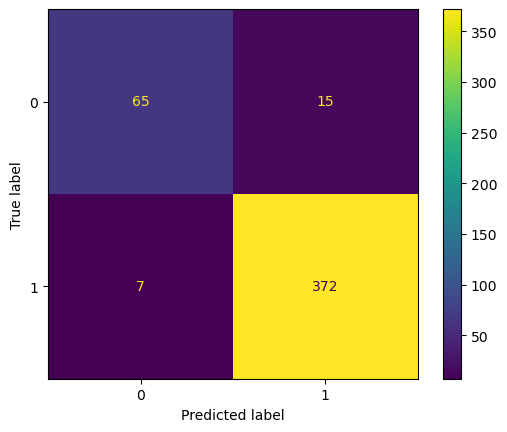

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(stq_model_2, X_test, y_test)

In [9]:
# Calculate accuracy
accuracy = stq_model_2.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.21%


In [10]:
from sklearn.metrics import classification_report
# Make prediction on the testing data
y_pred = stq_model_2.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86        72
           1       0.98      0.96      0.97       387

    accuracy                           0.95       459
   macro avg       0.90      0.93      0.91       459
weighted avg       0.96      0.95      0.95       459



In [11]:
from sklearn.metrics import roc_auc_score
y_pred_proba = stq_model_2.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_proba)

0.9744063324538258

In [12]:
y_pred = stq_model_2.predict(X_test)
y_pred_proba = stq_model_2.predict_proba(X_test)

### Finding and exportin gthe correctly and incorrectly tested data

In [13]:
folder_directory = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/unk_loc_leks/xgb_model_predictions"
# Make predictions on the test dataset
y_pred = stq_model_2.predict(X_test)
#predict proba
#y_pred = stq_model_2.predict_proba(X_test)

# Compare the predicted labels with the actual labels
correctly_predicted_indices = (y_pred == y_test)
incorrectly_predicted_indices = ~correctly_predicted_indices

# Extract rows with correct and incorrect predictions
correctly_predicted_rows = X_test[correctly_predicted_indices]
incorrectly_predicted_rows = X_test[incorrectly_predicted_indices]

# Filter original target binary classification data
original_target_correct = y_test[correctly_predicted_indices]
original_target_incorrect = y_test[incorrectly_predicted_indices]

# Concatenate original target with correctly and incorrectly predicted rows
correctly_predicted_rows_with_target = pd.concat([correctly_predicted_rows, original_target_correct], axis=1)
incorrectly_predicted_rows_with_target = pd.concat([incorrectly_predicted_rows, original_target_incorrect], axis=1)

#print("Rows predicted correctly with original target:")
#print(correctly_predicted_rows_with_target)

#print("\nRows predicted incorrectly with original target:")
#print(incorrectly_predicted_rows_with_target)

# Sort the row indices
correctly_predicted_rows_with_target_sorted = correctly_predicted_rows_with_target.sort_index()
incorrectly_predicted_rows_with_target_sorted = incorrectly_predicted_rows_with_target.sort_index()

correctly_predicted_rows_with_target_sorted.head()

,max_dsp_hub_score,max_dsp_centrality_score,avg_dsp_hub_score,avg_dsp_centrality_score,rnd_trip_hub_score,rnd_trip_centrality_score,hr_hub_score,hr_centrality_score,k_hub_score,k_centrality_score,k2_hub_score,k2_centrality_score,within_2000m
0,0.945,205.105,0.631,191.884,0.711,489.789,0.561,3651.066,0.000,92.0,0.000,1027.520,1
4,0.922,173.611,0.601,135.845,0.762,620.600,0.770,3350.399,0.000,10.0,0.010,466.184,1
7,0.885,298.915,0.013,803.176,0.001,3328.200,0.000,163.031,0.866,0.0,0.924,1.700,0
9,0.945,199.831,0.752,459.663,0.934,827.760,0.906,3054.429,0.391,0.0,0.597,24407.657,1
10,0.902,156.691,0.562,86.236,0.744,320.279,0.236,2733.001,0.000,0.0,0.000,3395.110,1


In [14]:
# finding the indices of only the correctly predicted testing data from the original dataframe
correctly_predicted_indices = correctly_predicted_rows_with_target_sorted.index.tolist()
correctly_predicted = data_with_coords.loc[correctly_predicted_indices]
#correctly_predicted
# Define the file path where you want to save the CSV file
correct_pred_csv_file_path = f"{folder_directory}/xgb_within_48m_cor_pred_testing.csv"

# Export the DataFrame to a CSV file
correctly_predicted.to_csv(correct_pred_csv_file_path, index=False)


# finding the indices of only the incorrectly predicted testing data from the original dataframe
incorrectly_predicted_indices = incorrectly_predicted_rows_with_target_sorted.index.tolist()
incorrectly_predicted = data_with_coords.loc[incorrectly_predicted_indices]
#incorrectly_predicted
# Define the file path where you want to save the CSV file
incorrect_pred_csv_file_path = f"{folder_directory}/xgb_within_48m_incor_pred_testing.csv"

# Export the DataFrame to a CSV file
incorrectly_predicted.to_csv(incorrect_pred_csv_file_path, index=False)

print("CSV files have been successfully saved.")

CSV files have been successfully saved.


In [15]:
from sklearn.metrics import log_loss, roc_auc_score

# Calculate log loss
log_loss(y_test, y_pred_proba)
# Calculate ROC AUC
#roc_auc_score(y_test, y_pred_proba[:,1])

0.31261764355328014

In [13]:

import shap

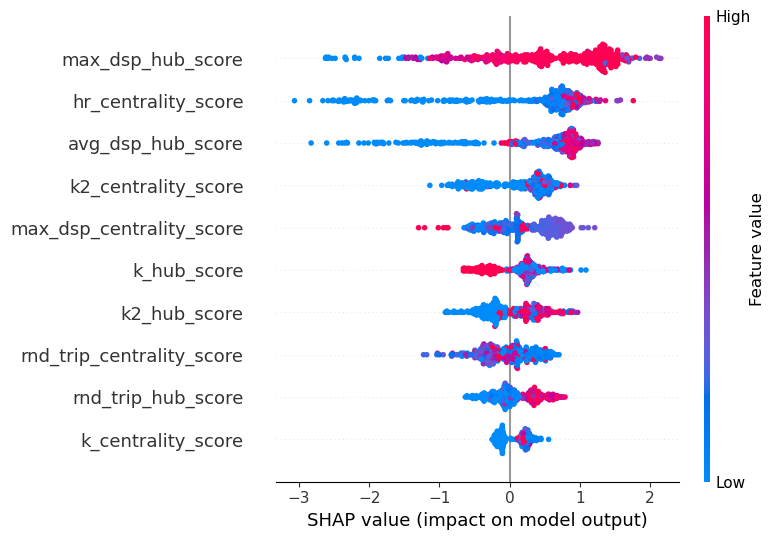

In [14]:
explainer = shap.TreeExplainer(stq_model_2)
shap_values = explainer.shap_values(X_test)
shap.TreeExplainer(stq_model_2).shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display = 10)

In [18]:
# Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)
shap_df_sorted = shap_df.sort_index()

X_test_sort = X_test.sort_index()
# Concatenate SHAP values DataFrame with the testing DataFrame
testing_df_with_shap = pd.concat([X_test_sort, shap_df_sorted, axis = 1])

print("Testing DataFrame with SHAP values:")
testing_df_with_shap

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (84265504.py, line 7)

In [ ]:
feature_names = X_test.columns


rf_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance

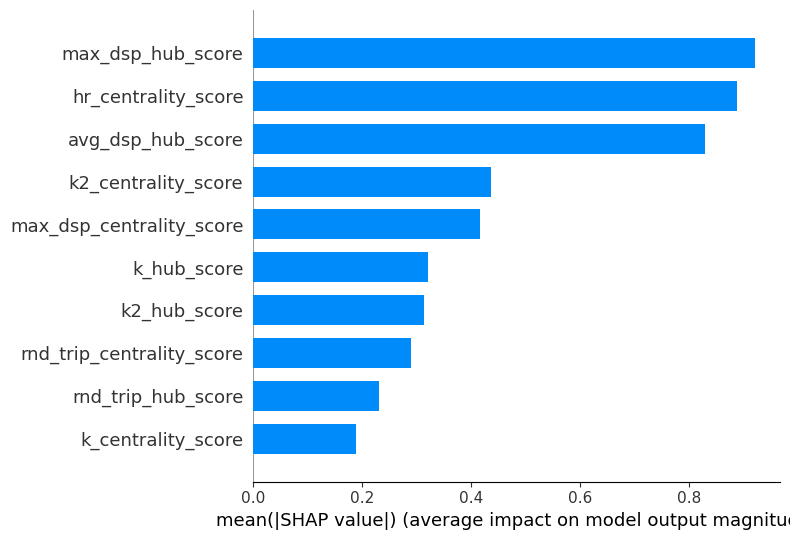

In [15]:
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display = 10)

# Testing a Random Forests model

In [16]:
# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        76
           1       0.98      0.97      0.97       383

    accuracy                           0.95       459
   macro avg       0.91      0.92      0.92       459
weighted avg       0.95      0.95      0.95       459



In [17]:
from sklearn.metrics import roc_auc_score
y_pred_proba = clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_proba)

0.9772097625329815

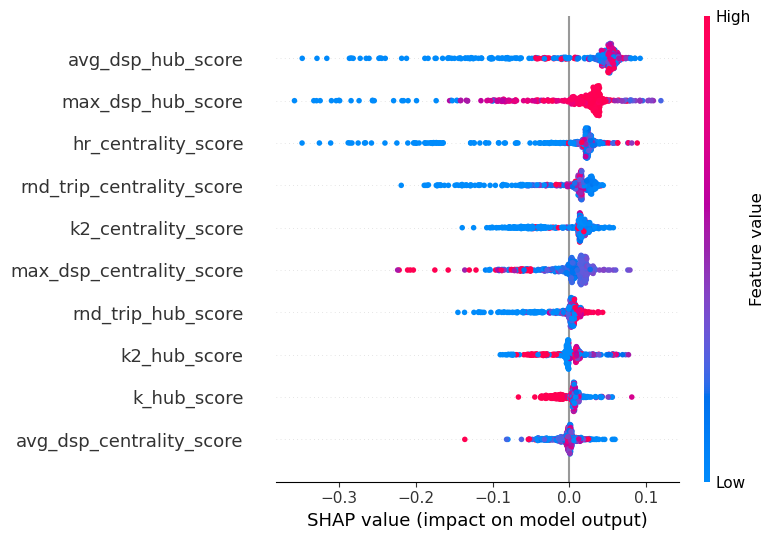

In [18]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
# Option 1: Plot for a specific class
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values[:, :, 1],  # Select SHAP values for the second class
    X_test,  
    max_display=10,  # Top 5 features
    plot_type='dot'
)
#plt.title('SHAP Summary Plot for Positive Class')
#plt.tight_layout()
#plt.show()

In [23]:
folder_directory = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/unk_loc_leks/rf_model_predictions"
# Make predictions on the test dataset
y_pred = stq_model_2.predict(X_test)
#predict proba
#y_pred = stq_model_2.predict_proba(X_test)

# Compare the predicted labels with the actual labels
correctly_predicted_indices = (y_pred == y_test)
incorrectly_predicted_indices = ~correctly_predicted_indices

# Extract rows with correct and incorrect predictions
correctly_predicted_rows = X_test[correctly_predicted_indices]
incorrectly_predicted_rows = X_test[incorrectly_predicted_indices]

# Filter original target binary classification data
original_target_correct = y_test[correctly_predicted_indices]
original_target_incorrect = y_test[incorrectly_predicted_indices]

# Concatenate original target with correctly and incorrectly predicted rows
correctly_predicted_rows_with_target = pd.concat([correctly_predicted_rows, original_target_correct], axis=1)
incorrectly_predicted_rows_with_target = pd.concat([incorrectly_predicted_rows, original_target_incorrect], axis=1)

#print("Rows predicted correctly with original target:")
#print(correctly_predicted_rows_with_target)

#print("\nRows predicted incorrectly with original target:")
#print(incorrectly_predicted_rows_with_target)

# Sort the row indices
correctly_predicted_rows_with_target_sorted = correctly_predicted_rows_with_target.sort_index()
incorrectly_predicted_rows_with_target_sorted = incorrectly_predicted_rows_with_target.sort_index()

correctly_predicted_rows_with_target_sorted.head()

# finding the indices of only the correctly predicted testing data from the original dataframe
correctly_predicted_indices = correctly_predicted_rows_with_target_sorted.index.tolist()
correctly_predicted = data_with_coords.loc[correctly_predicted_indices]
#correctly_predicted
# Define the file path where you want to save the CSV file
correct_pred_csv_file_path = f"{folder_directory}/rf_within_48m_cor_pred_testing.csv"

# Export the DataFrame to a CSV file
correctly_predicted.to_csv(correct_pred_csv_file_path, index=False)


# finding the indices of only the incorrectly predicted testing data from the original dataframe
incorrectly_predicted_indices = incorrectly_predicted_rows_with_target_sorted.index.tolist()
incorrectly_predicted = data_with_coords.loc[incorrectly_predicted_indices]
#incorrectly_predicted
# Define the file path where you want to save the CSV file
incorrect_pred_csv_file_path = f"{folder_directory}/rf_within_48m_incor_pred_testing.csv"

# Export the DataFrame to a CSV file
incorrectly_predicted.to_csv(incorrect_pred_csv_file_path, index=False)

print("CSV files have been successfully saved.")

CSV files have been successfully saved.


### Comparing the models

Model Performance Comparison:
           Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Random Forest   0.95207   0.966057  0.976253  0.971129  0.977210
1        XGBoost   0.95207   0.961240  0.981530  0.971279  0.974406


<Figure size 1000x600 with 0 Axes>

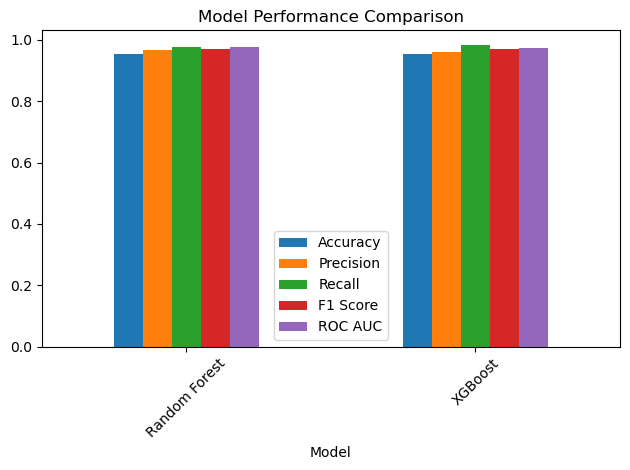

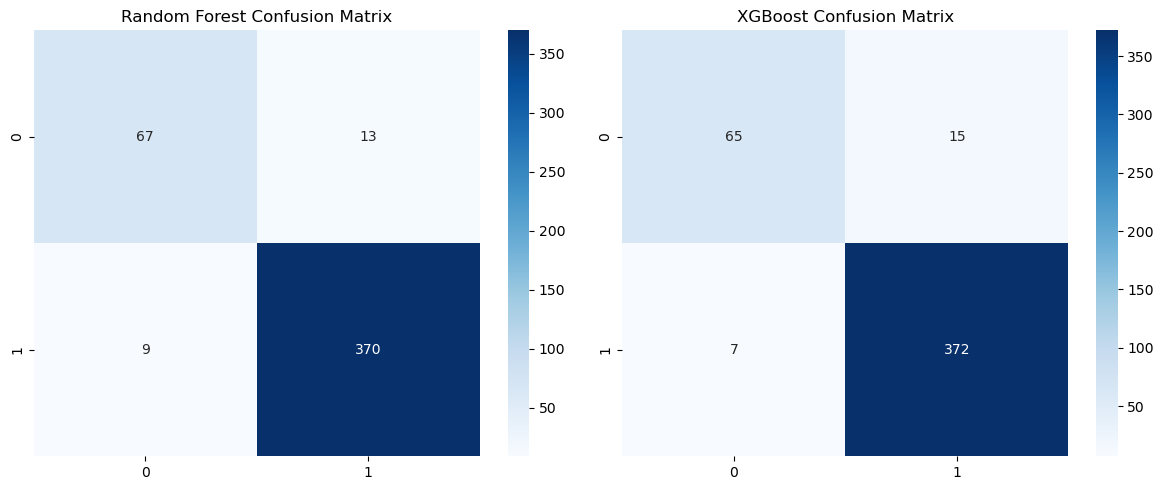


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        80
           1       0.97      0.98      0.97       379

    accuracy                           0.95       459
   macro avg       0.92      0.91      0.92       459
weighted avg       0.95      0.95      0.95       459


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.86        80
           1       0.96      0.98      0.97       379

    accuracy                           0.95       459
   macro avg       0.93      0.90      0.91       459
weighted avg       0.95      0.95      0.95       459



In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix,
    classification_report
)
from sklearn.model_selection import cross_val_score
import seaborn as sns

# Assuming you have X_train, X_test, y_train, y_test from previous steps

# Function to evaluate and compare models
def compare_models(rf_model, xgb_model, X_test, y_test):
    # Predictions
    rf_pred = rf_model.predict(X_test)
    xgb_pred = xgb_model.predict(X_test)
    
    # Probabilities for ROC AUC
    rf_proba = rf_model.predict_proba(X_test)[:, 1]
    xgb_proba = xgb_model.predict_proba(X_test)[:, 1]
    
    # Metrics dictionary
    metrics = {
        'Model': ['Random Forest', 'XGBoost'],
        'Accuracy': [
            accuracy_score(y_test, rf_pred),
            accuracy_score(y_test, xgb_pred)
        ],
        'Precision': [
            precision_score(y_test, rf_pred),
            precision_score(y_test, xgb_pred)
        ],
        'Recall': [
            recall_score(y_test, rf_pred),
            recall_score(y_test, xgb_pred)
        ],
        'F1 Score': [
            f1_score(y_test, rf_pred),
            f1_score(y_test, xgb_pred)
        ],
        'ROC AUC': [
            roc_auc_score(y_test, rf_proba),
            roc_auc_score(y_test, xgb_proba)
        ]
    }
    
    # Create comparison dataframe
    comparison_df = pd.DataFrame(metrics)
    print("Model Performance Comparison:")
    print(comparison_df)
    
    # Visualization of metrics
    plt.figure(figsize=(10, 6))
    comparison_df.set_index('Model').plot(kind='bar', rot=45)
    plt.title('Model Performance Comparison')
    plt.tight_layout()
    plt.show()
    
    # Confusion Matrices
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_test, rf_pred), 
                annot=True, fmt='d', cmap='Blues')
    plt.title('Random Forest Confusion Matrix')
    
    plt.subplot(1, 2, 2)
    sns.heatmap(confusion_matrix(y_test, xgb_pred), 
                annot=True, fmt='d', cmap='Blues')
    plt.title('XGBoost Confusion Matrix')
    
    plt.tight_layout()
    plt.show()
    
    # Detailed Classification Report
    print("\nRandom Forest Classification Report:")
    print(classification_report(y_test, rf_pred))
    
    print("\nXGBoost Classification Report:")
    print(classification_report(y_test, xgb_pred))
    
    return comparison_df

# Run the comparison
comparison_results = compare_models(clf, stq_model_2, X_test, y_test)